In [ ]:
!pip install -q transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 35.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 11.6 MB/s eta 0:00:00


In [ ]:
!pip install -q youtube_transcript_api


In [ ]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [ ]:
youtube_video = "https://www.youtube.com/watch?v=Ji46s5BHdr0"

In [ ]:
video_id = youtube_video.split("=")[1]

In [ ]:
video_id

'Ji46s5BHdr0'

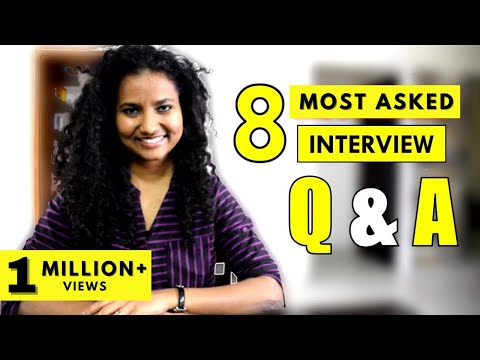

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [ ]:
YouTubeTranscriptApi.get_transcript(video_id)
transcript = YouTubeTranscriptApi.get_transcript(video_id)

In [ ]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


Downloading:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

In [ ]:
result =""
for i in transcript:
  result +=' '+i['text']
print(len(result))

10896


In [ ]:
num_iters = int(len(result)/1000)
summarized_text = [] 
for i in range(0,num_iters+1):
    start=0 
    start=i*1000
    end=(i+1)*1000 
    out=summarizer(result[start:end])
    out=out[0]
    out=out['summary_text']
    
    summarized_text.append(out)


#print(summarized_text)

In [ ]:
str(summarized_text)

'[" There are 3 different types of interview questions: Technical, Analytical and Behavioral . Interviewers want to understand how are your problem-solving skills in the interview . Even the \'Interviewer\' was an \'Interviewee\' once, so at the end of the day, even they want you to do well .", " In my experience, around 65% to 70% of the questions will be behavioral because through these questions, the interviewer decides whether you will be the right fit for the job or not . In today\'s video, we are going to discuss the 8 most commonly asked behavioral questions . We analyse these questions based on a) What the interviewer wants to know, b) Common Mistakes we make while answering them and c) How to answer these questions?", \' The only thing the interviewer is interested in is if you are the right person for the job . Summarize your experience or your education in a single line while you use an adjective to define your personality . For example, in case you are a fresher, then you c

In [ ]:
#len(summarized_text)